## Analytics of churn rate of Bank Customer

## Import libiraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Read csv

In [2]:
raw_data = pd.read_csv('Churn_Modelling.csv')

In [3]:
raw_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Overall churn rate:

In [5]:
f"{len(raw_data[raw_data['Exited']==1])/len(raw_data):.2%}"

'20.37%'

## Dropping some irrelevant data for further data analysis

In [6]:
data = raw_data.drop(['Surname','RowNumber','CustomerId'], axis=1)

In [7]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

## Dealing with categorical variable

### 1. encoding gender, 0=female, 1=male

In [9]:
data_gen = data[:]

In [10]:
data_gen['Gender'] = data_gen['Gender'].map({'Female':0, 'Male':1})

In [11]:
data_gen

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


### 2. encoding geography

In [12]:
data_gen['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
data_gen['IsFrance'] = [1 if country == 'France' else 0 for country in data_gen['Geography']]

In [14]:
data_gen['IsSpain'] = [1 if country == 'Spain' else 0 for country in data_gen['Geography']]

In [15]:
data_gen['IsGermany'] = [1 if country == 'Germany' else 0 for country in data_gen['Geography']]

### Finally dropping the original Geography column

In [16]:
df = data_gen[:].drop(['Geography'], axis=1)

In [17]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsFrance,IsSpain,IsGermany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,0,1


## Have a look at Age group
- Age segmentation means focusing on the age range most valuable to your product or service. Marketing demographic age brackets are usually 18-24, 25-34, 35-44, 45-54, 55-64, and 65 and older.
- Group 1 = 0-18
- Group 2 = 18-24
- Group 3 = 25-34
- Group 4 = 35-44
- Group 5 = 45-54
- Group 6 = 55-64
- Group 7 = 65 or above

In [18]:
df['Age_group'] = pd.cut(df['Age'],
                      bins=[0,18,24,34,44,54,64,np.inf],
                      labels=[1,2,3,4,5,6,7])

In [19]:
df['Age_group'].value_counts()

4    3981
3    3222
5    1458
6     600
2     435
7     282
1      22
Name: Age_group, dtype: int64

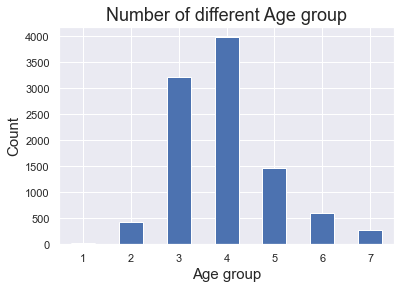

In [20]:
df['Age_group'].value_counts().sort_index().plot.bar(rot=0)
plt.xlabel('Age group', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Number of different Age group', fontsize=18)
plt.show()

In [21]:
#Drop the Age col:
df =df.drop(['Age'],axis=1)

### Lets calculate the exit rate in different age group

In [22]:
Age_group_exit_rate = {}
for i in range(1,8):
    rate = len(df[(df.Age_group == i) & (df.Exited == 1)]) / len(df[df['Age_group'] == i])
    Age_group_exit_rate[f'Group{i}'] = f"{np.round(rate,4):.2%}"

In [23]:
Age_group_exit_rate

{'Group1': '9.09%',
 'Group2': '8.74%',
 'Group3': '7.76%',
 'Group4': '17.66%',
 'Group5': '48.15%',
 'Group6': '49.83%',
 'Group7': '15.25%'}

We can clearly notice that, the exit rate is highest among Group 6(Age:55-64), about 49.8% 
<br> and group 5 (Age:45-54), about 48.1%

## Lets look at the exit rate in  different geography and gender

In [24]:
def check_percent(table,col,val):
    return len(table[(table[col] == val) & (table['Exited'] == 1)]) / len(table[table[col] == val])

In [25]:
Geo_exit_rate = {}
for country in ['IsFrance', 'IsSpain', 'IsGermany']:
    Geo_exit_rate[country] = f'{check_percent(df, country,1):.2%}'
Geo_exit_rate

{'IsFrance': '16.15%', 'IsSpain': '16.67%', 'IsGermany': '32.44%'}

In [26]:
def dict_to_xy(dict,xstrip=None,ystrip='%'):
    x=[]
    y=[]
    for i,j in list(dict.items()):
        x.append(i.strip(xstrip))
        y.append(float(j.strip(ystrip)))
    return x,y

In [27]:
country, percent = dict_to_xy(Geo_exit_rate, xstrip='Is')

In [28]:
def bar_chart(dict_,xstrip=None, title=None, xlabel=None, ylabel='Churn Rate', grid=False, ylim=(0,100),text_val=True,
             width=0.3,title_size=15, xlabel_size=14, ylabel_size=14,
             figsize=(10,5)):
    plt.figure(figsize=figsize)
    plt.title(title, fontsize=title_size)
    
    x,height = dict_to_xy(dict_,xstrip)
    retained = [100 - i for i in height]
    x_axis = np.arange(len(x))
    
    bar1 = plt.bar(x_axis-width/2,height,width,label='Churn')
    bar2 = plt.bar(x_axis+width/2,retained,width,label='Retained')
    
    if text_val:
        for bar in bar1+bar2:
            y_val = bar.get_height()
            plt.text(bar.get_x()+width/4,y_val+0.1,"{:.0%}".format(y_val/100),fontsize=12)
    plt.xticks(x_axis,x)
    
    plt.ylabel(ylabel,fontsize=ylabel_size)
    plt.xlabel(xlabel, fontsize=xlabel_size)
    plt.legend(fontsize=12)
    
    if grid:
        plt.grid()
    if ylim:
        plt.ylim(ylim)
        
    plt.show()

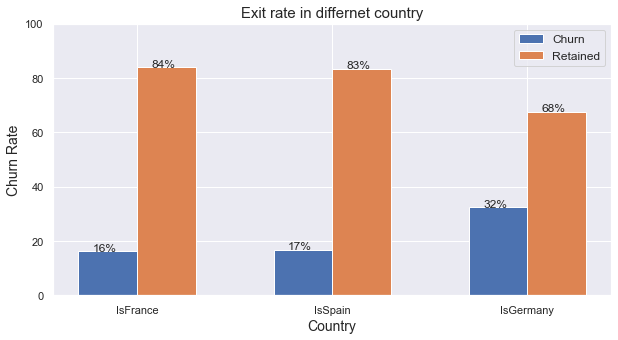

In [29]:
bar_chart(Geo_exit_rate,title='Exit rate in differnet country',xlabel='Country')

In [30]:
Gender_exit_rate = {}
Gender_exit_rate['Female'] = f"{check_percent(df,'Gender',0):.2%}"
Gender_exit_rate['Male'] = f"{check_percent(df,'Gender',1):.2%}"
Gender_exit_rate

{'Female': '25.07%', 'Male': '16.46%'}

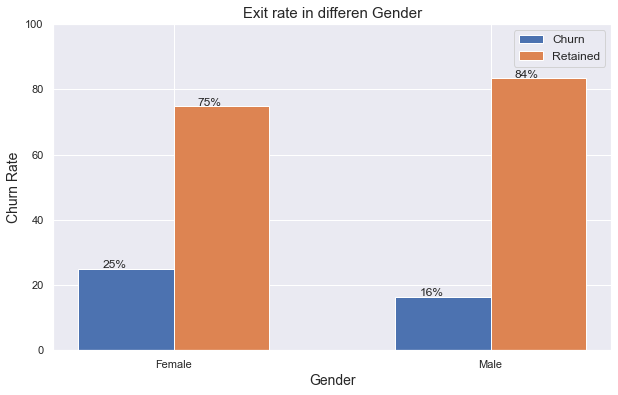

In [31]:
bar_chart(Gender_exit_rate,title='Exit rate in differen Gender', figsize=(10,6),xlabel='Gender')

# Lets took a look at another variable

## Tenure

In [32]:
Tenure_exit_rate = {}
for i in range(0,11):
    Tenure_exit_rate[f'{i}'] = f"{check_percent(df,'Tenure',i):.2%}"
Tenure_exit_rate

{'0': '23.00%',
 '1': '22.42%',
 '2': '19.18%',
 '3': '21.11%',
 '4': '20.53%',
 '5': '20.65%',
 '6': '20.27%',
 '7': '17.22%',
 '8': '19.22%',
 '9': '21.65%',
 '10': '20.61%'}

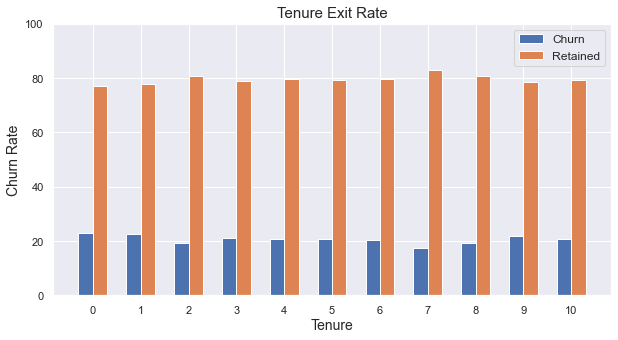

In [33]:
bar_chart(Tenure_exit_rate,title='Tenure Exit Rate',xlabel='Tenure',text_val=False)

## NumOfProducts

In [34]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [35]:
Prod_exit_rate = {}
for num in range(1,5):
    Prod_exit_rate[f"{num}"] = f"{check_percent(df,'NumOfProducts',num):.2%}"
Prod_exit_rate

{'1': '27.71%', '2': '7.58%', '3': '82.71%', '4': '100.00%'}

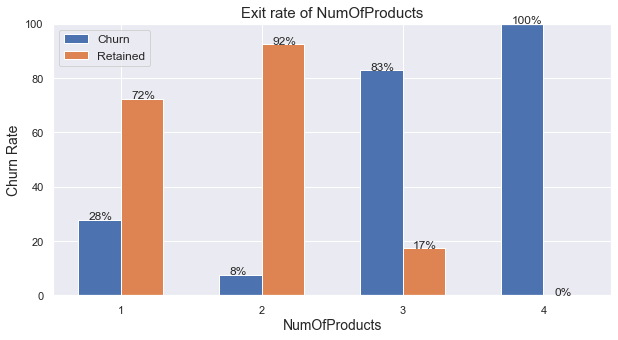

In [36]:
bar_chart(Prod_exit_rate,title='Exit rate of NumOfProducts', xlabel='NumOfProducts')

## HasCrCard

In [37]:
HasCrCard_exit_rate={}
HasCrCard_exit_rate['Yes'] = f"{check_percent(df,'HasCrCard',1):.2%}"
HasCrCard_exit_rate['No'] = f"{check_percent(df,'HasCrCard',0):.2%}"
HasCrCard_exit_rate

{'Yes': '20.18%', 'No': '20.81%'}

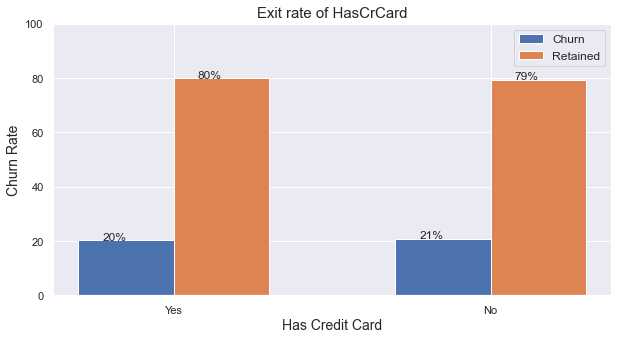

In [38]:
bar_chart(HasCrCard_exit_rate,title='Exit rate of HasCrCard',xlabel='Has Credit Card')

## IsActiveMember

In [39]:
IsActiveMember_exit_rate ={}
IsActiveMember_exit_rate['Yes'] = f"{check_percent(df,'IsActiveMember',1):.2%}"
IsActiveMember_exit_rate['No'] = f"{check_percent(df,'IsActiveMember',0):.2%}"
IsActiveMember_exit_rate

{'Yes': '14.27%', 'No': '26.85%'}

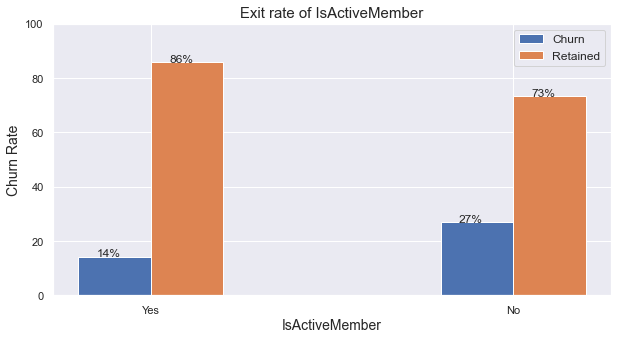

In [40]:
bar_chart(IsActiveMember_exit_rate,title='Exit rate of IsActiveMember',xlabel='IsActiveMember',width=0.2)

## CreditScore

<AxesSubplot:>

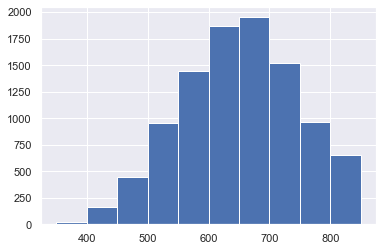

In [41]:
df['CreditScore'].hist(bins=10)

There is few outliers such that is located outside 1.5 times the interquartile range above the upper quartile and below the lower quartile (Q1 - 1.5 * IQR or Q3 + 1.5 * IQR).

Text(0.5, 1.0, 'BoxPlot of CreditScore')

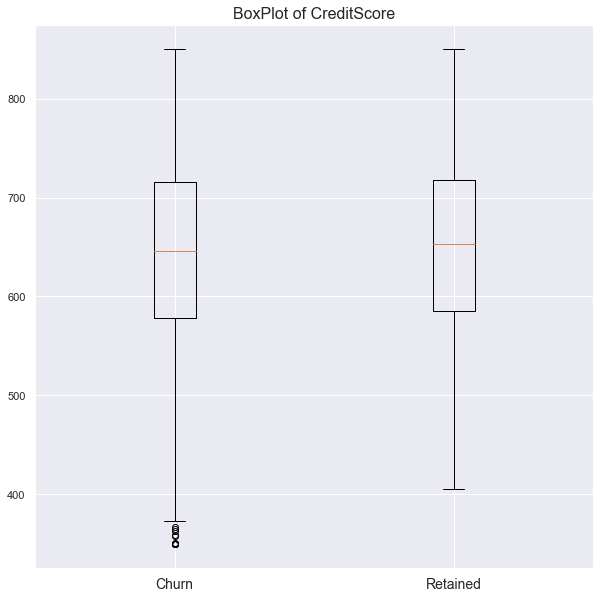

In [42]:
churn = df[df['Exited']==1]['CreditScore']
retained = df[df['Exited']==0]['CreditScore']
dt = [churn,retained]
plt.figure(figsize=(10,10))
plt.boxplot(dt)
plt.xticks([1,2],['Churn', 'Retained'],fontsize=14)
plt.title('BoxPlot of CreditScore',fontsize=16)

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

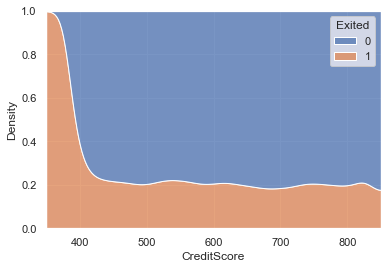

In [43]:
sns.kdeplot(data=df, x="CreditScore", hue="Exited",multiple='fill',cut=0)

## EstimatedSalary

<AxesSubplot:>

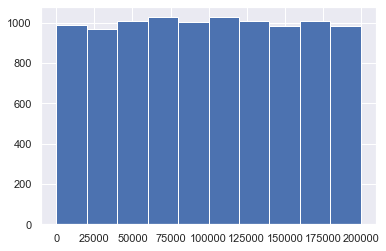

In [44]:
df['EstimatedSalary'].hist(bins=10)

Text(0.5, 1.0, 'BoxPlot of EstimatedSalary')

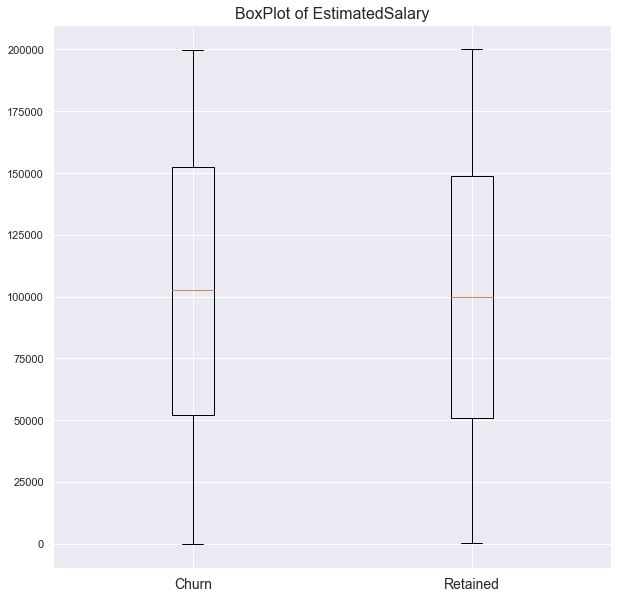

In [45]:
churn = df[df['Exited']==1]['EstimatedSalary']
retained = df[df['Exited']==0]['EstimatedSalary']
dt = [churn,retained]
plt.figure(figsize=(10,10))
plt.boxplot(dt)
plt.xticks([1,2],['Churn', 'Retained'],fontsize=14)
plt.title('BoxPlot of EstimatedSalary',fontsize=16)


([<matplotlib.axis.XTick at 0x1d74113b970>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

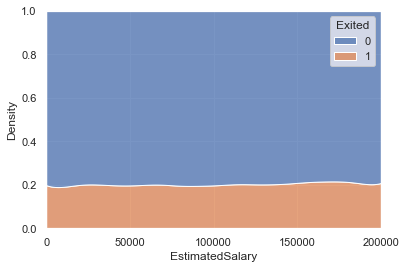

In [46]:
sns.kdeplot(data=df, x="EstimatedSalary", hue="Exited",multiple='fill',cut=0)
plt.xticks([0,50000,100000,150000,200000])

## Balance	

<AxesSubplot:>

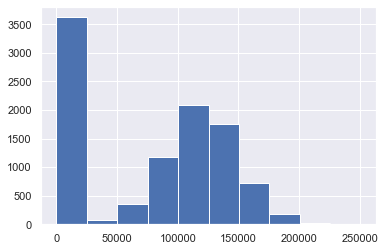

In [47]:
df['Balance'].hist(bins=10)

Text(0.5, 1.0, 'BoxPlot of Balance')

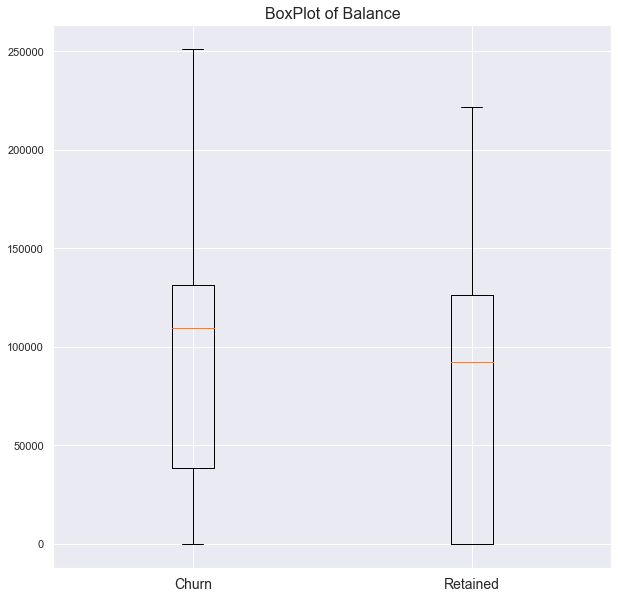

In [48]:
churn = df[df['Exited']==1]['Balance']
retained = df[df['Exited']==0]['Balance']
dt = [churn,retained]
plt.figure(figsize=(10,10))
plt.boxplot(dt)
plt.xticks([1,2],['Churn', 'Retained'],fontsize=14)
plt.title('BoxPlot of Balance',fontsize=16)

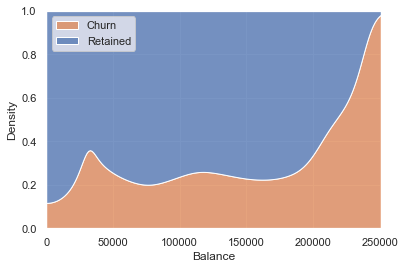

In [49]:
sns.kdeplot(data=df, x="Balance", hue="Exited",multiple='fill',cut=0)
plt.legend(labels=['Churn','Retained'],loc='upper left')

# Modelling, training classifier

In [50]:
y = df['Exited'].values
X = df.drop(['Exited'],axis=1).values

### Shuffle the dataset and split train_valid_test_set

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier

In [52]:
split = StratifiedShuffleSplit(test_size=1000, random_state=42)
for train_idx, test_idx in split.split(X,y):
    #print("TRAIN:", train_idx, "TEST:", test_idx)
    X_train_full,X_test = X[train_idx], X[test_idx]
    y_train_full,y_test = y[train_idx], y[test_idx]

for train_idx, test_idx in split.split(X_train_full,y_train_full):
    X_train,X_valid = X_train_full[train_idx], X_train_full[test_idx]
    y_train,y_valid = y_train_full[train_idx], y_train_full[test_idx]

In [53]:
len(X_train),len(X_valid),len(X_test)

(8000, 1000, 1000)

## Randomforest Classifier

In [54]:
rnf = RandomForestClassifier(n_estimators=500,n_jobs=-1,min_samples_split=10)
rnf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=500, n_jobs=-1)

In [55]:
Accuracy_score={}
Accuracy_score['Train_set'] = rnf.score(X_train,y_train)
Accuracy_score['Valid_set'] = rnf.score(X_valid,y_valid)
Accuracy_score['Test_set'] = rnf.score(X_test,y_test)
print(Accuracy_score)

{'Train_set': 0.923375, 'Valid_set': 0.86, 'Test_set': 0.857}


### Feature importances

In [56]:
col = df.drop(['Exited'],axis=1).columns

In [198]:
zip_file = zip(col,rnf.feature_importances_)
for name, score in sorted(zip_file,key=lambda x:x[1],reverse=True):
    print("{:<16}{:.2%}\n".format(name,score))

Age_group       20.62%

NumOfProducts   18.40%

Balance         14.64%

EstimatedSalary 12.85%

CreditScore     12.67%

Tenure          6.87%

IsActiveMember  5.99%

IsGermany       3.01%

Gender          1.71%

HasCrCard       1.41%

IsFrance        0.96%

IsSpain         0.88%



## XGBoost

In [126]:
import xgboost

In [124]:
xgb_reg = xgboost.XGBClassifier()
xgb_reg.fit(X_train, y_train,
           eval_set=[(X_valid,y_valid)],early_stopping_rounds=2)                       

[15:36:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.54849
[1]	validation_0-logloss:0.47119
[2]	validation_0-logloss:0.42656
[3]	validation_0-logloss:0.39988
[4]	validation_0-logloss:0.38338
[5]	validation_0-logloss:0.37217
[6]	validation_0-logloss:0.36597
[7]	validation_0-logloss:0.36057
[8]	validation_0-logloss:0.35612
[9]	validation_0-logloss:0.35455
[10]	validation_0-logloss:0.35127
[11]	validation_0-logloss:0.35277
[12]	validation_0-logloss:0.35180


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
Accuracy_score={}
Accuracy_score['Train_set'] = xgb_reg.score(X_train,y_train)
Accuracy_score['Valid_set'] = xgb_reg.score(X_valid,y_valid)
Accuracy_score['Test_set'] = xgb_reg.score(X_test,y_test)
print(Accuracy_score)

{'Train_set': 0.881875, 'Valid_set': 0.854, 'Test_set': 0.854}


## Neural Network

In [127]:
import tensorflow as tf
from tensorflow import keras

In [147]:
model = keras.models.Sequential([
    keras.layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='nadam',metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_5 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_33 (Dense)            (None, 300)               3900      
                                                                 
 batch_normalization_6 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_34 (Dense)            (None, 100)               30100     
                                                                 
 batch_normalization_7 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                     

In [150]:
early_stopping = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [151]:
history = model.fit(X_train,y_train,
                   epochs=100,
                   validation_data=[X_valid,y_valid],
                   callbacks=[early_stopping])

Epoch 1/100
250/250 [==============================] - 2s 10ms/step - loss: 0.3138 - accuracy: 0.8701 - val_loss: 0.3613 - val_accuracy: 0.8600
Epoch 2/100
250/250 [==============================] - 2s 9ms/step - loss: 0.3138 - accuracy: 0.8705 - val_loss: 0.3709 - val_accuracy: 0.8550
Epoch 3/100
250/250 [==============================] - 2s 9ms/step - loss: 0.3099 - accuracy: 0.8687 - val_loss: 0.3694 - val_accuracy: 0.8460
Epoch 4/100
250/250 [==============================] - 2s 9ms/step - loss: 0.3119 - accuracy: 0.8689 - val_loss: 0.3781 - val_accuracy: 0.8530
Epoch 5/100
250/250 [==============================] - 2s 9ms/step - loss: 0.3120 - accuracy: 0.8683 - val_loss: 0.3648 - val_accuracy: 0.8540
Epoch 6/100
250/250 [==============================] - 2s 9ms/step - loss: 0.3060 - accuracy: 0.8755 - val_loss: 0.3651 - val_accuracy: 0.8560
Epoch 7/100
250/250 [==============================] - 2s 9ms/step - loss: 0.3075 - accuracy: 0.8701 - val_loss: 0.3625 - val_accuracy: 0.854

In [174]:
for name,val in zip(['Loss','Accuracy'],model.evaluate(X_test,y_test)):
    print('{:<10}{:.4}'.format(name,val))

32/32 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8470
Loss      0.3596
Accuracy  0.847


In [182]:
predict_class = [1 if i >= 0.6 else 0 for i in model.predict(X_test)]
print('Accuracy:', f'{sum(predict_class == y_test) / len(y_test):.1%}')

Accuracy: 85.3%
